# Train / Test
Começaremos criando algum conjunto de dados para o qual queremos construir um modelo (neste caso, uma regressão polinomial):

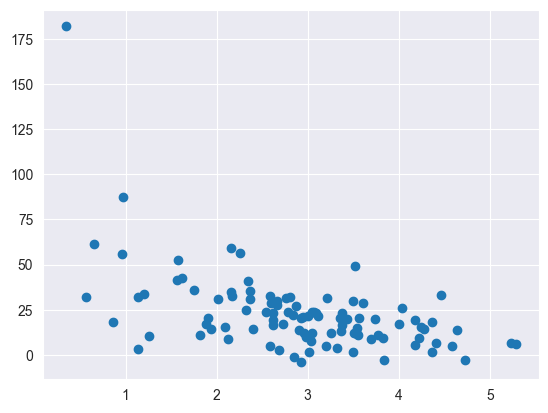

In [22]:
import matplotlib.pyplot as plt
# Importa a funcionalidade inline para exibir gráficos diretamente no Jupyter Notebook
%matplotlib inline

# Importa o pacote NumPy e as funções do Pylab para manipulação de dados e criação de gráficos
import numpy as np
from pylab import *

# Define uma semente para o gerador de números aleatórios (garante que os resultados sejam reproduzíveis)
np.random.seed(2)

# Gera 100 valores de velocidades de página, distribuídos normalmente com média 3.0 e desvio padrão 1.0
pageSpeeds = np.random.normal(3.0, 1.0, 100)

# Gera 100 valores para a quantidade de compra, também distribuídos normalmente, com média 50 e desvio padrão 30
# Em seguida, divide cada valor gerado pela respectiva velocidade de página, criando uma relação inversa
purchaseAmount = np.random.normal(50.0, 30.0, 100) / pageSpeeds

# Cria um gráfico de dispersão entre as variáveis 'pageSpeeds' (velocidade de página) e 'purchaseAmount' (quantidade de compra)
scatter(pageSpeeds, purchaseAmount)

plt.show()

Agora vamos dividir os dados em dois - 80% deles serão usados ​​para “treinar” nosso modelo e os outros 20% para testá-lo. Dessa forma, podemos evitar o overfitting.

In [23]:
# Separa os primeiros 80 valores de 'pageSpeeds' como conjunto de treino (trainX)
trainX = pageSpeeds[:80]

# Separa os últimos 20 valores de 'pageSpeeds' como conjunto de teste (testX)
testX = pageSpeeds[80:]

# Separa os primeiros 80 valores de 'purchaseAmount' como conjunto de treino (trainY)
trainY = purchaseAmount[:80]

# Separa os últimos 20 valores de 'purchaseAmount' como conjunto de teste (testY)
testY = purchaseAmount[80:]


Aqui está nosso conjunto de dados de treinamento:

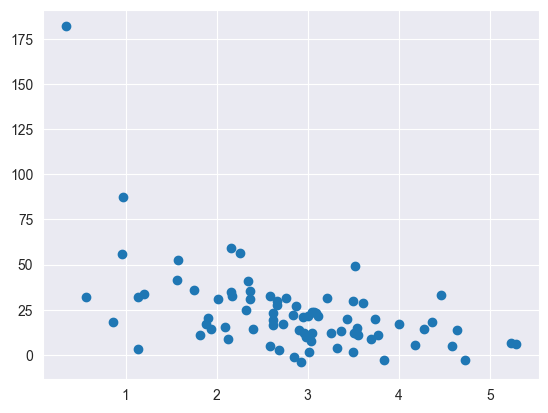

In [24]:
# Cria um gráfico de dispersão para visualizar os dados de treinamento
# 'trainX' contém as velocidades de página e 'trainY' contém os valores de compra correspondentes
scatter(trainX, trainY)

# Exibe a grade no gráfico para facilitar a visualização dos dados
grid(True)

# Mostra o gráfico
show()


E nosso conjunto de dados de teste:

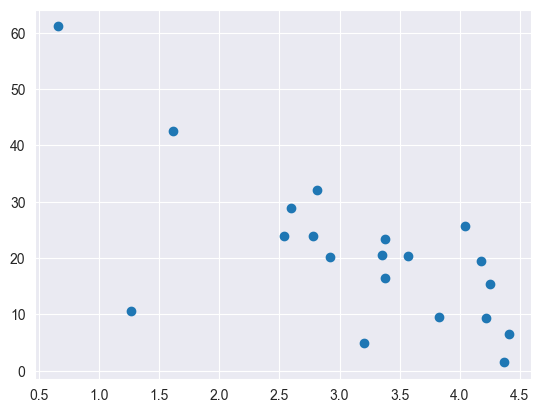

In [25]:
# Cria um gráfico de dispersão para visualizar os dados de teste
# 'testX' contém as velocidades de página e 'testY' contém os valores de compra correspondentes
scatter(testX, testY)

# Exibe a grade no gráfico para facilitar a visualização dos dados
grid(True)

# Mostra o gráfico
show()


Agora tentaremos ajustar um polinômio de 8º grau a esses dados (o que é quase certamente um overfitting, dado o que sabemos sobre como ele foi gerado!)

In [26]:
# Converte 'trainX' e 'trainY' para arrays NumPy para facilitar o uso em operações matemáticas
x = np.array(trainX)
y = np.array(trainY)

# Ajusta um polinômio de grau 8 aos dados de treinamento (x, y)
# np.polyfit retorna os coeficientes do polinômio ajustado, que são usados para criar um objeto polinomial
p4 = np.poly1d(np.polyfit(x, y, 8))


Vamos representar graficamente nosso polinômio em relação aos dados de treinamento:

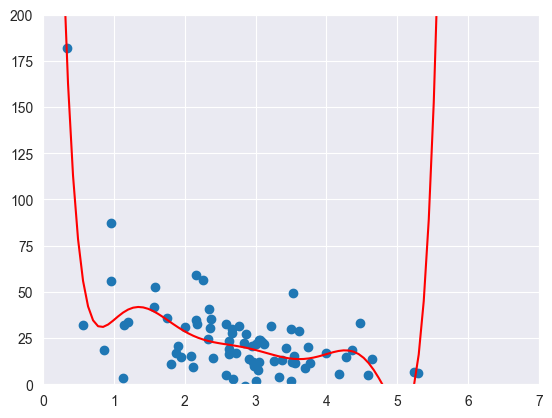

In [27]:
# Importa o módulo pyplot do matplotlib para criar gráficos
import matplotlib.pyplot as plt

# Cria um array 'xp' que contém 100 pontos igualmente espaçados entre 0 e 7
xp = np.linspace(0, 7, 100)

# Cria um objeto de eixos para o gráfico
axes = plt.axes()

# Define os limites do eixo x de 0 a 7
axes.set_xlim([0, 7])

# Define os limites do eixo y de 0 a 200
axes.set_ylim([0, 200])

# Plota os dados de treinamento como pontos de dispersão
plt.scatter(x, y)

# Plota a curva ajustada pelo polinômio de grau 8, usando 'xp' para gerar valores y correspondentes
plt.plot(xp, p4(xp), c='r')  # A curva é plotada em vermelho (c='r')

# Exibe o gráfico resultante
plt.show()


E contra nossos dados de teste:

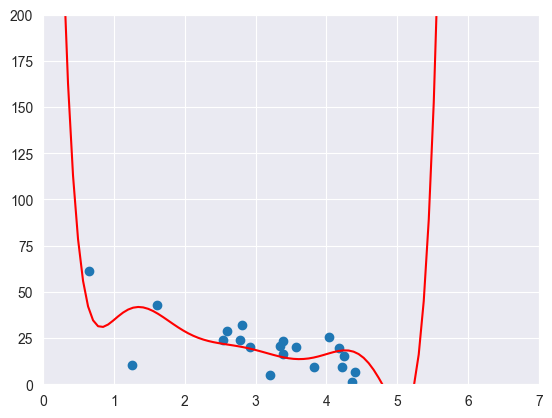

In [28]:
# Converte os dados de teste 'testX' e 'testY' para arrays NumPy
testx = np.array(testX)
testy = np.array(testY)

# Cria um objeto de eixos para o gráfico
axes = plt.axes()

# Define os limites do eixo x de 0 a 7
axes.set_xlim([0, 7])

# Define os limites do eixo y de 0 a 200
axes.set_ylim([0, 200])

# Plota os dados de teste como pontos de dispersão
plt.scatter(testx, testy)

# Plota a curva ajustada pelo polinômio de grau 8, usando 'xp' para gerar valores y correspondentes
plt.plot(xp, p4(xp), c='r')  # A curva é plotada em vermelho (c='r')

# Exibe o gráfico resultante
plt.show()


Não parece tão ruim quando você apenas olha, mas a pontuação de r ao quadrado nos dados do teste é horrível! Isso nos diz que nosso modelo não é tão bom assim...

In [29]:
# Importa a função r2_score do módulo sklearn.metrics para calcular o coeficiente de determinação R²
from sklearn.metrics import r2_score

# Calcula o coeficiente de determinação R² para os dados de teste
# testy: valores reais das compras
# p4(testx): valores previstos pelo polinômio ajustado para os dados de teste
r2 = r2_score(testy, p4(testx))

# Exibe o valor do coeficiente R²
print(r2)


0.3001816861251314


...mesmo que se ajuste melhor aos dados de treinamento:

In [30]:
# Importa a função r2_score do módulo sklearn.metrics para calcular o coeficiente de determinação R²
from sklearn.metrics import r2_score

# Calcula o coeficiente de determinação R² para os dados de treinamento
# np.array(trainY): valores reais das compras no conjunto de treinamento
# p4(np.array(trainX)): valores previstos pelo polinômio ajustado para os dados de treinamento
r2 = r2_score(np.array(trainY), p4(np.array(trainX)))

# Exibe o valor do coeficiente R²
print(r2)


0.6427069514691321


Se você estiver trabalhando com um Pandas DataFrame (usando dados tabulares rotulados), o scikit-learn possui funções train_test_split integradas para facilitar isso.

Mais tarde falaremos sobre formas ainda mais robustas de treinamento/teste, como validação cruzada K-fold - onde testamos múltiplas divisões diferentes dos dados, para garantir que não tivemos sorte apenas com onde os dividimos.

## Activity
Tente medir o erro nos dados de teste usando ajustes polinomiais de graus diferentes. Qual grau funciona melhor?

Grau: 1, R²: 0.4225, MSE: 103.5442
Grau: 2, R²: 0.2935, MSE: 126.6820
Grau: 3, R²: 0.2727, MSE: 130.4045
Grau: 4, R²: 0.3936, MSE: 108.7288
Grau: 5, R²: 0.5041, MSE: 88.9248
Grau: 6, R²: 0.6050, MSE: 70.8253
Grau: 7, R²: 0.5461, MSE: 81.3808
Grau: 8, R²: 0.3002, MSE: 125.4845
Grau: 9, R²: 0.2162, MSE: 140.5513
Grau: 10, R²: 0.2249, MSE: 138.9919
Grau: 11, R²: 0.2682, MSE: 131.2231
Grau: 12, R²: 0.0595, MSE: 168.6363
Grau: 13, R²: 0.2260, MSE: 138.7931
Grau: 14, R²: 0.2938, MSE: 126.6337
Grau: 15, R²: 0.1325, MSE: 155.5446


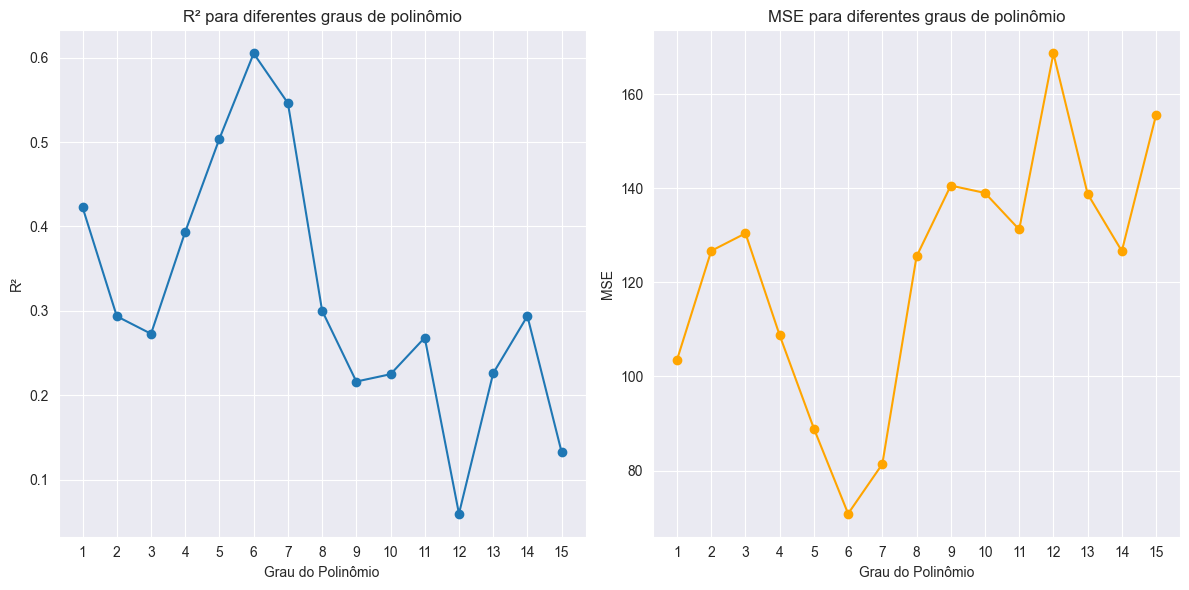

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

# Converte os dados de treinamento e teste para arrays NumPy
trainX = np.array(trainX)
trainY = np.array(trainY)
testX = np.array(testX)
testY = np.array(testY)

# Define os graus a serem testados
graus = range(1,16 )  # Graus de 1 a 12
r2_scores = []  # Lista para armazenar os valores de R²
mse_scores = []  # Lista para armazenar os valores de MSE

# Loop para ajustar polinômios de diferentes graus
for grau in graus:
    # Ajusta um polinômio ao grau especificado
    p = np.poly1d(np.polyfit(trainX, trainY, grau))
    
    # Calcula as previsões para os dados de teste
    predictions = p(testX)
    
    # Calcula o R² e o MSE
    r2 = r2_score(testY, predictions)
    mse = mean_squared_error(testY, predictions)
    
    # Armazena os resultados
    r2_scores.append(r2)
    mse_scores.append(mse)

# Exibe os resultados
for grau, r2, mse in zip(graus, r2_scores, mse_scores):
    print(f"Grau: {grau}, R²: {r2:.4f}, MSE: {mse:.4f}")

# Plota os resultados
plt.figure(figsize=(12, 6))

# Gráfico do R²
plt.subplot(1, 2, 1)
plt.plot(graus, r2_scores, marker='o')
plt.title('R² para diferentes graus de polinômio')
plt.xlabel('Grau do Polinômio')
plt.ylabel('R²')
plt.xticks(graus)

# Gráfico do MSE
plt.subplot(1, 2, 2)
plt.plot(graus, mse_scores, marker='o', color='orange')
plt.title('MSE para diferentes graus de polinômio')
plt.xlabel('Grau do Polinômio')
plt.ylabel('MSE')
plt.xticks(graus)

# Exibe os gráficos
plt.tight_layout()
plt.show()


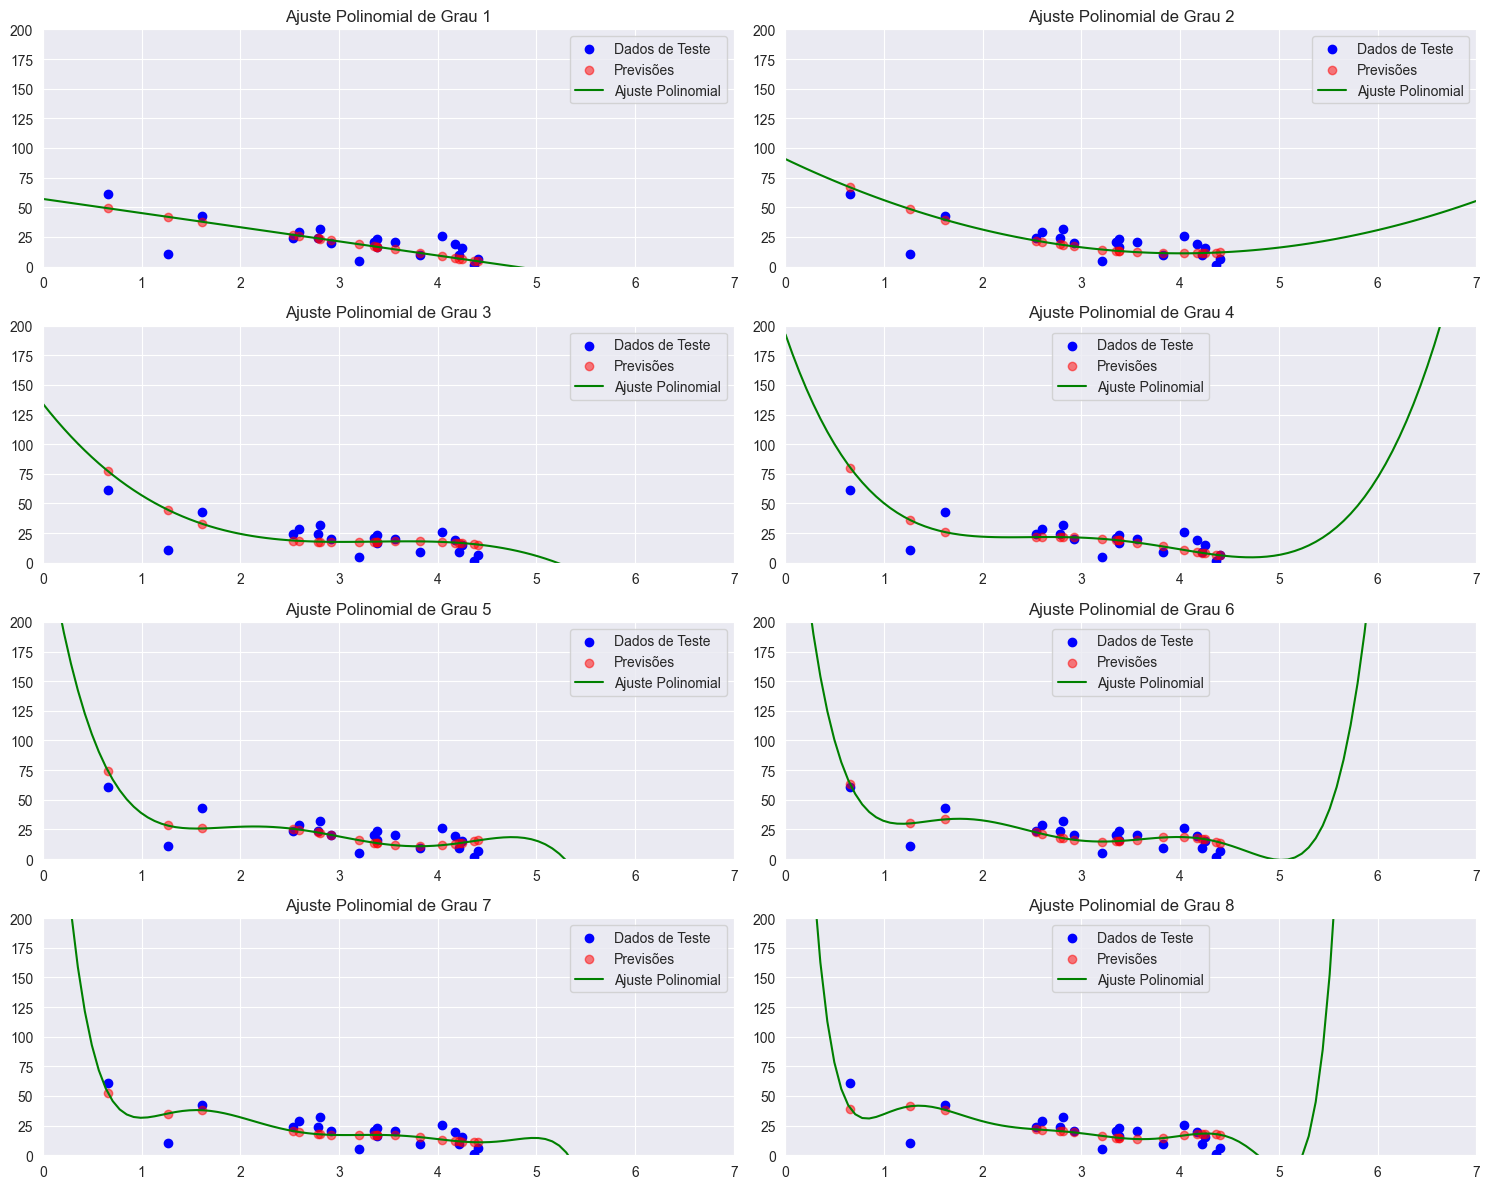

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

# Converte os dados de treinamento e teste para arrays NumPy
trainX = np.array(trainX)
trainY = np.array(trainY)
testX = np.array(testX)
testY = np.array(testY)

# Define os graus a serem testados
graus = range(1, 9)  # Graus de 1 a 8

# Cria uma figura para os gráficos
plt.figure(figsize=(15, 12))

# Loop para ajustar polinômios de diferentes graus
for i, grau in enumerate(graus, start=1):
    # Ajusta um polinômio ao grau especificado
    p = np.poly1d(np.polyfit(trainX, trainY, grau))
    
    # Calcula as previsões para os dados de teste
    predictions = p(testX)
    
    # Cria um novo gráfico para cada grau
    plt.subplot(4, 2, i)  # 4 linhas, 2 colunas, i-ésimo gráfico
    plt.scatter(testX, testY, color='blue', label='Dados de Teste')  # Plota dados de teste
    plt.scatter(testX, predictions, color='red', label='Previsões', alpha=0.5)  # Plota previsões
    plt.plot(np.linspace(0, 7, 100), p(np.linspace(0, 7, 100)), color='green', label='Ajuste Polinomial')  # Plota a curva de ajuste
    plt.title(f'Ajuste Polinomial de Grau {grau}')
    plt.xlim(0, 7)
    plt.ylim(0, 200)
    plt.legend()

# Exibe os gráficos
plt.tight_layout()
plt.show()
